## Pandas 메소드

- ```pandas.date_range``` : 날짜 추출
    - 주로 사용하는 파라미터 : start, end, periods, freq

- ```pandas.pivot_table``` : 

- ```pandas.DataFrame.query```

### padas.date_range

In [3]:
import pandas as pd

date_list = pd.date_range('2020-07-01',periods=100,freq='D')
print(date_list)

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
               '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17',
               '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
               '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25',
      

In [4]:
# strftime() 로 원하는 날짜,시간 포맷으로 출력
for today in date_list:
    print(today.strftime('%Y%m%d'))  # 연월일

20200701
20200702
20200703
20200704
20200705
20200706
20200707
20200708
20200709
20200710
20200711
20200712
20200713
20200714
20200715
20200716
20200717
20200718
20200719
20200720
20200721
20200722
20200723
20200724
20200725
20200726
20200727
20200728
20200729
20200730
20200731
20200801
20200802
20200803
20200804
20200805
20200806
20200807
20200808
20200809
20200810
20200811
20200812
20200813
20200814
20200815
20200816
20200817
20200818
20200819
20200820
20200821
20200822
20200823
20200824
20200825
20200826
20200827
20200828
20200829
20200830
20200831
20200901
20200902
20200903
20200904
20200905
20200906
20200907
20200908
20200909
20200910
20200911
20200912
20200913
20200914
20200915
20200916
20200917
20200918
20200919
20200920
20200921
20200922
20200923
20200924
20200925
20200926
20200927
20200928
20200929
20200930
20201001
20201002
20201003
20201004
20201005
20201006
20201007
20201008


In [5]:
for today in date_list:
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date="+(today.strftime('%Y%m%d'))
    print(url)

https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200701
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200702
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200703
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200704
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200705
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200706
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200707
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200708
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200709
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200710
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200711
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200712
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=20200713
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=2

## 2. HTML 문서 파싱하기

In [6]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

for today in date_list:
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date="+(today.strftime('%Y%m%d'))
    html = urlopen(url)

    soup = BeautifulSoup(html.read(), "html.parser")
    
    titles = soup.find_all('div',{'class':'itt5'})
    points = soup.find_all('td',{'class':'point'})
    
    titles_text = []
    points_text = []
    
    for t,p in zip(titles,points):   # 길이가 같아 zip으로 한번에 처리 가능
        titles_text.append(t.text.strip('\n'))
        points_text.append(float(p.text))

### 2일치의 영화 데이터 출력

In [9]:
## 날짜 저장해서 print
from bs4 import BeautifulSoup
from urllib.request import urlopen

date_list = pd.date_range('2020-07-01',periods=2,freq='D')

movie_title = []
movie_point = []
movie_date = []

for today in date_list:
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date="+(today.strftime('%Y%m%d'))
    html = urlopen(url)

    soup = BeautifulSoup(html.read(), "html.parser")
    
    titles = soup.find_all('div',{'class':'tit5'})
    points = soup.find_all('td',{'class':'point'})
    
    titles_text = []
    points_text = []
    date = []
    
    for t,p in zip(titles,points):   # 길이가 같아 zip으로 한번에 처리 가능
        titles_text.append(t.text.strip('\n'))
        points_text.append(float(p.text))
        date.append(today)
        
    
    movie_title += titles_text
    movie_point += points_text
    movie_date += date

print(movie_title[:5])
print(movie_point[:5])
print(movie_date)

['그린 북', '가버나움', '베일리 어게인', '원더', '포드 V 페라리']
[9.59, 9.59, 9.53, 9.49, 9.49]
[Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D'), Timestamp('2020-07-01 00:00:00', freq='D')

### 100일로 증가

In [10]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

# tqdm 모듈 : 진행 상황을 바 형태로 표현해줌
from tqdm.notebook import tqdm  

date_list = pd.date_range('2020-07-01',periods=100,freq='D')

movie_title = []
movie_point = []
movie_date = []

for today in tqdm(date_list):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date="+(today.strftime('%Y%m%d'))
    html = urlopen(url)

    soup = BeautifulSoup(html.read(), "html.parser")
    
    titles = soup.find_all('div',{'class':'tit5'})
    points = soup.find_all('td',{'class':'point'})
    
    titles_text = []
    points_text = []
    date = []
    
    for t,p in zip(titles,points):   # 길이가 같아 zip으로 한번에 처리 가능
        titles_text.append(t.text.strip('\n'))
        points_text.append(float(p.text))
        date.append(today)
        
    
    movie_title += titles_text
    movie_point += points_text
    movie_date += date

print(movie_point)


[9.59, 9.59, 9.53, 9.49, 9.49, 9.49, 9.49, 9.47, 9.44, 9.44, 9.42, 9.42, 9.42, 9.41, 9.41, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.39, 9.39, 9.39, 9.38, 9.38, 9.38, 9.38, 9.38, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.36, 9.36, 9.36, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.59, 9.59, 9.53, 9.49, 9.49, 9.49, 9.49, 9.47, 9.44, 9.44, 9.42, 9.42, 9.42, 9.41, 9.41, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.39, 9.39, 9.39, 9.38, 9.38, 9.38, 9.38, 9.38, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.36, 9.36, 9.36, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.59, 9.59, 9.53, 9.49, 9.49, 9.49, 9.49, 9.47, 9.44, 9.44, 9.42, 9.42, 9.42, 9.41, 9.41, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.39, 9.39, 9.39, 9.38, 9.38, 9.38, 9.38, 9.38, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.37, 9.36, 9.36, 9.36, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.35, 9.59, 9.59, 9.53, 9.49, 9.49, 9.49, 9.49, 9.47, 9.44, 9.44, 9.42, 9.42, 9.41, 9.41, 9.41, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 

## 데이터 표로 만들기

In [11]:
import pandas as pd

frame = pd.DataFrame({'date':movie_date, 'title':movie_title, 'point':movie_point})
frame

,date,title,point
0,2020-07-01,그린 북,9.59
1,2020-07-01,가버나움,9.59
2,2020-07-01,베일리 어게인,9.53
3,2020-07-01,원더,9.49
4,2020-07-01,포드 V 페라리,9.49
...,...,...,...
4995,2020-10-08,쉰들러 리스트,9.36
4996,2020-10-08,클레멘타인,9.36
4997,2020-10-08,안녕 베일리,9.36
4998,2020-10-08,서유기 2 - 선리기연,9.36


### pandas.pivot_table

In [13]:
import numpy as np

movie_point_table = pd.pivot_table(frame,values=['point'],index=['title'], aggfunc=np.sum)
movie_point_table.head(10)

,point
title,
가버나움,959.00
굿 윌 헌팅,907.75
굿바이 마이 프랜드,505.42
"그대, 고맙소 : 김호중 생애 첫 팬미팅 무비",57.28
그린 북,959.02
글래디에이터,939.00
나 홀로 집에,941.00
달링,486.20
당갈,947.56


In [14]:
movie_point_table = pd.pivot_table(frame,values=['point'],index=['title'], aggfunc=np.mean)
movie_point_table.head(10)

,point
title,
가버나움,9.590000
굿 윌 헌팅,9.358247
굿바이 마이 프랜드,9.359630
"그대, 고맙소 : 김호중 생애 첫 팬미팅 무비",9.546667
그린 북,9.590200
글래디에이터,9.390000
나 홀로 집에,9.410000
달링,9.350000
당갈,9.475600


In [16]:
movie_point_sort_table = movie_point_table.sort_values(by='point',ascending=False)
movie_point_sort_table.head(10)

,point
title,
그린 북,9.590200
가버나움,9.590000
먼 훗날 우리,9.588537
디지몬 어드벤처 라스트 에볼루션 : 인연,9.583030
"그대, 고맙소 : 김호중 생애 첫 팬미팅 무비",9.546667
베일리 어게인,9.530000
아일라,9.493900
원더,9.492600
포드 V 페라리,9.490000


In [17]:
# 소수점 두자리 수 까지만
pd.options.display.float_format = '{:.2f}'.format

movie_point_table = pd.pivot_table(frame,values=['point'],index=['title'], aggfunc=np.mean)
movie_point_sort_table = movie_point_table.sort_values(by='point',ascending=False)
movie_point_table.head(10)

,point
title,
가버나움,9.59
굿 윌 헌팅,9.36
굿바이 마이 프랜드,9.36
"그대, 고맙소 : 김호중 생애 첫 팬미팅 무비",9.55
그린 북,9.59
글래디에이터,9.39
나 홀로 집에,9.41
달링,9.35
당갈,9.48


### pandas.DataFrame.query

- 원하는 행을 필터링 or 선택하기
    1. 비교 연산자
    2. in 연산자
    3. 논리 연산자
    4. 외부 변수 참조 연산
    5. 인덱스 검색
    6. 문자열 부분검색

In [18]:
## 특정 데이터만 추려서 보기

expr = "title == '토이 스토리 3'"
search_movie = frame.query(expr)
print(search_movie)

           date     title  point
28   2020-07-01  토이 스토리 3   9.38
77   2020-07-02  토이 스토리 3   9.38
127  2020-07-03  토이 스토리 3   9.38
178  2020-07-04  토이 스토리 3   9.38
228  2020-07-05  토이 스토리 3   9.38
...         ...       ...    ...
4781 2020-10-04  토이 스토리 3   9.39
4831 2020-10-05  토이 스토리 3   9.39
4881 2020-10-06  토이 스토리 3   9.39
4931 2020-10-07  토이 스토리 3   9.39
4981 2020-10-08  토이 스토리 3   9.39

[100 rows x 3 columns]


In [19]:
expr = "title == ['토이 스토리 3','그린 북']"  # 여러개 가져오기
search_movie = frame.query(expr)
print(search_movie)

           date     title  point
0    2020-07-01      그린 북   9.59
28   2020-07-01  토이 스토리 3   9.38
50   2020-07-02      그린 북   9.59
77   2020-07-02  토이 스토리 3   9.38
100  2020-07-03      그린 북   9.59
...         ...       ...    ...
4881 2020-10-06  토이 스토리 3   9.39
4900 2020-10-07      그린 북   9.59
4931 2020-10-07  토이 스토리 3   9.39
4950 2020-10-08      그린 북   9.59
4981 2020-10-08  토이 스토리 3   9.39

[200 rows x 3 columns]


## 그래프 그리기

In [20]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic') # 한글 넣기 위해 폰트 설정
plt.rcParams['axes.unicode_minus']=False
plt.style.use("ggplot")

In [22]:
expr = "title == '토이 스토리 3'"
search_movie = frame.query(expr)
print(search_movie)

           date     title  point
28   2020-07-01  토이 스토리 3   9.38
77   2020-07-02  토이 스토리 3   9.38
127  2020-07-03  토이 스토리 3   9.38
178  2020-07-04  토이 스토리 3   9.38
228  2020-07-05  토이 스토리 3   9.38
...         ...       ...    ...
4781 2020-10-04  토이 스토리 3   9.39
4831 2020-10-05  토이 스토리 3   9.39
4881 2020-10-06  토이 스토리 3   9.39
4931 2020-10-07  토이 스토리 3   9.39
4981 2020-10-08  토이 스토리 3   9.39

[100 rows x 3 columns]


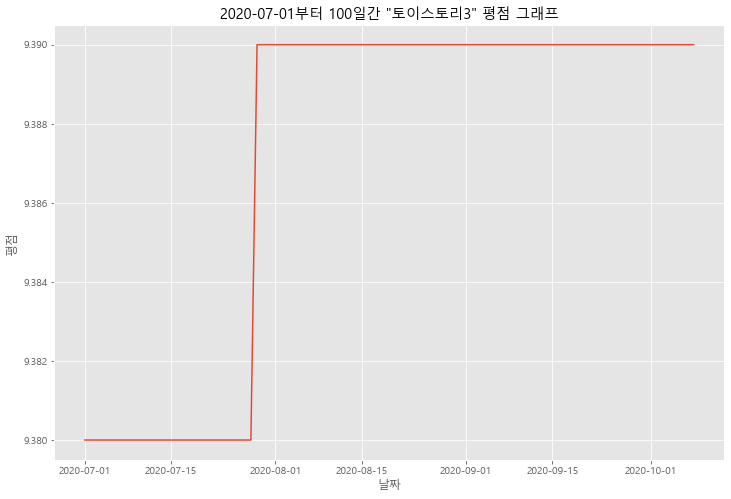

In [23]:
plt.figure(figsize=(12,8))
plt.title('2020-07-01부터 100일간 "토이스토리3" 평점 그래프')
plt.plot(search_movie['date'],search_movie['point'])
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show()

### 다른 영화 그래프 그리기

먼 훗날 우리


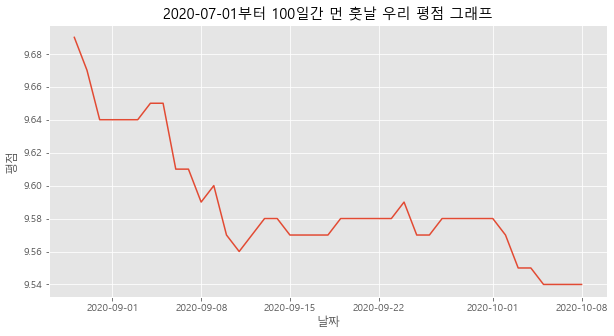

In [24]:
input_title = input()  # input 받음

expr = "title == ['{}']".format(input_title)
search_movie = frame.query(expr)

plt.figure(figsize=(10,5))
plt.title('2020-07-01부터 100일간 {} 평점 그래프'.format(input_title))
plt.plot(search_movie['date'],search_movie['point'])
plt.xlabel('날짜')
plt.ylabel('평점')
plt.show()